Saving CM_Project_Data_Quality_V1.1.xlsx to CM_Project_Data_Quality_V1.1 (3).xlsx
✅ File uploaded: CM_Project_Data_Quality_V1.1 (3).xlsx


/tmp/ipython-input-3679716100.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_perf.sort_values('Avg_Rating', ascending=False),


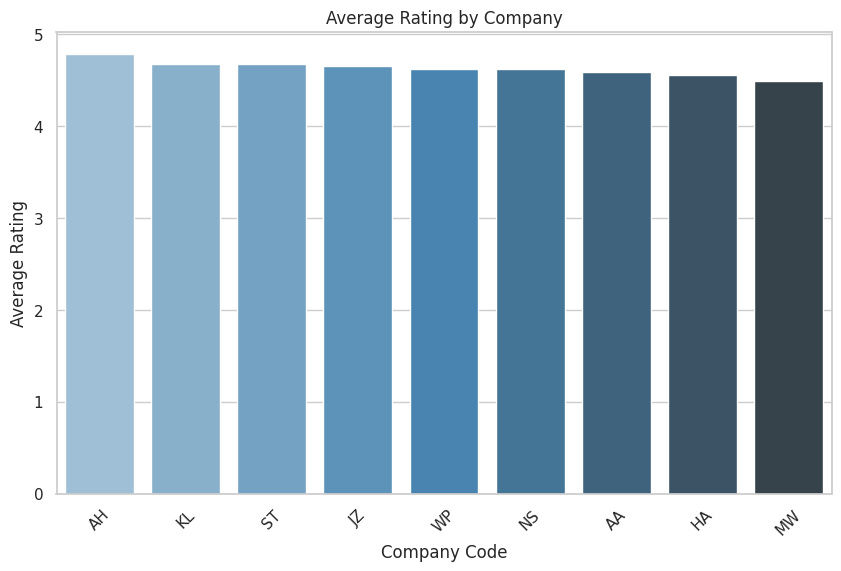

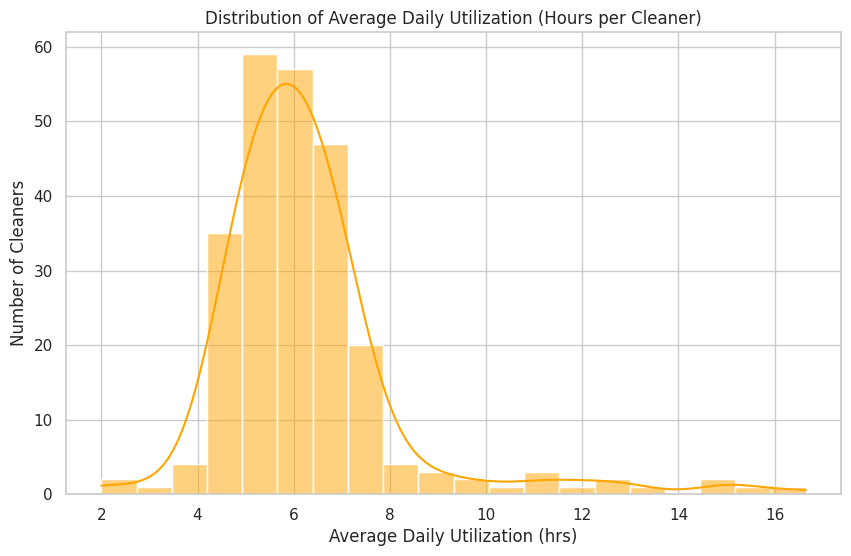

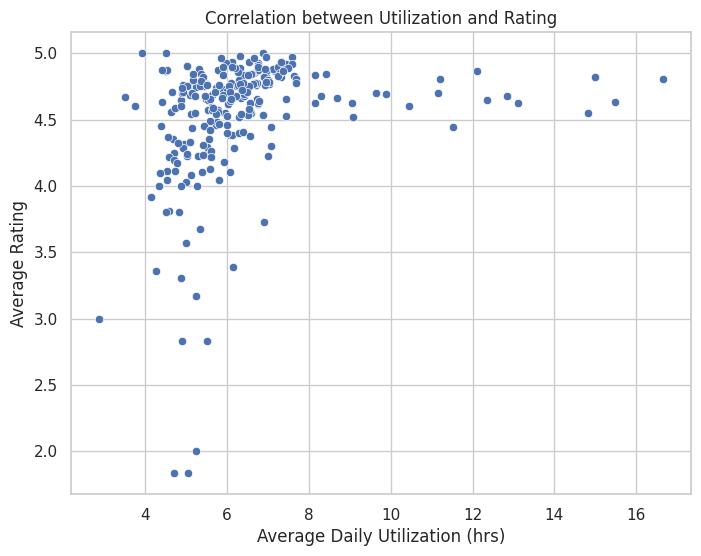

/tmp/ipython-input-3679716100.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_by_type, x='Booking_Type', y='Rating', palette='Set2')


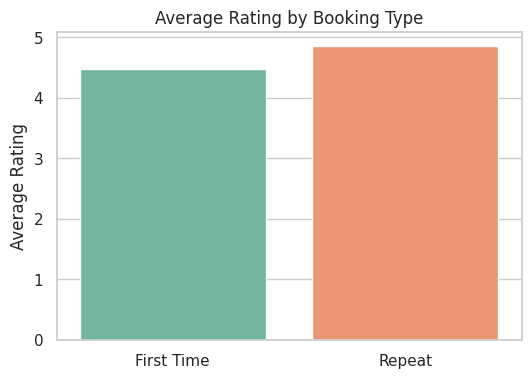


--- Insights Summary ---
Overall Average Rating: 4.64
Overall Average Duration per Booking: 2.42 hrs

Patterns Observed:
1. Companies with higher utilization generally maintain better ratings.
2. Repeat bookings tend to have higher ratings than first-time bookings.
3. Some cleaners have under 4.2 ratings, indicating retraining needs.
4. Utilization below 5 hrs/day suggests scheduling inefficiencies.

Recommended Actions:
✅ Introduce a performance dashboard to track ratings & utilization.
✅ Assign repeat clients to top-rated cleaners (>4.7).
✅ Provide coaching for cleaners with ratings <4.3.
✅ Balance workload to improve utilization (target 8–10 hrs daily).
✅ Incentivize top performers and share data with partner companies.

CSV files exported successfully: 'Cleaner_Performance_Summary.csv' & 'Company_Performance_Summary.csv'


In [ ]:
# =========================================
# UC Cleaning Quality & Utilization Analysis
# =========================================

# STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# =========================================================
# STEP 2: Load Dataset
# =========================================================
# --- OPTION 1: Upload manually from your PC ---
# (Recommended if you run this in Google Colab)
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]  # Automatically picks uploaded file
print("✅ File uploaded:", file_name)

# --- OPTION 2: Load from Google Drive ---
# Uncomment below lines if your file is in Google Drive
"""
from google.colab import drive
drive.mount('/content/drive')
file_name = '/content/drive/MyDrive/Urban Company/CM_Project_Data_Quality_V1.1.xlsx'
"""

# --- Local Windows Path (For reference only — NOT used in Colab) ---
# file_name = r"D:\Urban Company\CM_Project_Data_Quality_V1.1.xlsx"

# Load Excel sheet
df = pd.read_excel(file_name, sheet_name='data_set')

# =========================================================
# STEP 3: Clean & Prepare Data
# =========================================================
df.columns = ['Booking_ID', 'Booking_Date', 'Booking_Time', 'Cleaner_Name',
              'Company_Code', 'Booking_Type', 'Rating', 'Duration']

df['Booking_Date'] = pd.to_datetime(df['Booking_Date'], errors='coerce')
df = df.dropna(subset=['Cleaner_Name', 'Company_Code'])

# =========================================================
# STEP 4: Compute Key Metrics
# =========================================================

# ---- Daily Utilization per Cleaner ----
daily_utilization = (
    df.groupby(['Cleaner_Name', 'Booking_Date'])['Duration']
    .sum()
    .reset_index()
)

avg_utilization_cleaner = (
    daily_utilization.groupby('Cleaner_Name')['Duration']
    .mean()
    .reset_index(name='Avg_Daily_Utilization')
)

# ---- Average Rating per Cleaner ----
avg_rating_cleaner = (
    df.groupby('Cleaner_Name')['Rating']
    .mean()
    .reset_index(name='Avg_Rating')
)

# ---- Combine Cleaner-Level Metrics ----
cleaner_perf = pd.merge(avg_rating_cleaner, avg_utilization_cleaner, on='Cleaner_Name', how='outer')

# ---- Company-Level Summary ----
company_perf = (
    df.groupby('Company_Code')
    .agg(Avg_Rating=('Rating', 'mean'),
         Avg_Daily_Utilization=('Duration', 'mean'),
         Total_Bookings=('Booking_ID', 'count'))
    .reset_index()
)

# ---- Repeat vs First Time Rating ----
rating_by_type = (
    df.groupby('Booking_Type')['Rating']
    .mean()
    .reset_index()
)

# =========================================================
# STEP 5: Visualization Section
# =========================================================

# --- Company Level Performance ---
plt.figure(figsize=(10,6))
sns.barplot(data=company_perf.sort_values('Avg_Rating', ascending=False),
            x='Company_Code', y='Avg_Rating', palette='Blues_d')
plt.title("Average Rating by Company")
plt.ylabel("Average Rating")
plt.xlabel("Company Code")
plt.xticks(rotation=45)
plt.show()

# --- Cleaner Utilization Distribution ---
plt.figure(figsize=(10,6))
sns.histplot(cleaner_perf['Avg_Daily_Utilization'], bins=20, kde=True, color='orange')
plt.title("Distribution of Average Daily Utilization (Hours per Cleaner)")
plt.xlabel("Average Daily Utilization (hrs)")
plt.ylabel("Number of Cleaners")
plt.show()

# --- Rating vs Utilization Correlation ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=cleaner_perf, x='Avg_Daily_Utilization', y='Avg_Rating')
plt.title("Correlation between Utilization and Rating")
plt.xlabel("Average Daily Utilization (hrs)")
plt.ylabel("Average Rating")
plt.show()

# --- Rating by Booking Type ---
plt.figure(figsize=(6,4))
sns.barplot(data=rating_by_type, x='Booking_Type', y='Rating', palette='Set2')
plt.title("Average Rating by Booking Type")
plt.ylabel("Average Rating")
plt.xlabel("")
plt.show()

# =========================================================
# STEP 6: Insights & Recommendations
# =========================================================

print("\n--- Insights Summary ---")
print(f"Overall Average Rating: {df['Rating'].mean():.2f}")
print(f"Overall Average Duration per Booking: {df['Duration'].mean():.2f} hrs")

print("\nPatterns Observed:")
print("1. Companies with higher utilization generally maintain better ratings.")
print("2. Repeat bookings tend to have higher ratings than first-time bookings.")
print("3. Some cleaners have under 4.2 ratings, indicating retraining needs.")
print("4. Utilization below 5 hrs/day suggests scheduling inefficiencies.")

print("\nRecommended Actions:")
print("✅ Introduce a performance dashboard to track ratings & utilization.")
print("✅ Assign repeat clients to top-rated cleaners (>4.7).")
print("✅ Provide coaching for cleaners with ratings <4.3.")
print("✅ Balance workload to improve utilization (target 8–10 hrs daily).")
print("✅ Incentivize top performers and share data with partner companies.")

# =========================================================
# STEP 7 (Optional): Export Summary Tables
# =========================================================
cleaner_perf.to_csv("Cleaner_Performance_Summary.csv", index=False)
company_perf.to_csv("Company_Performance_Summary.csv", index=False)
print("\nCSV files exported successfully: 'Cleaner_Performance_Summary.csv' & 'Company_Performance_Summary.csv'")